## FINK & VAST Crossmatches

This notebook is for reading in and grouping the crossmatched FINK and VAST sources into families, as well as some basic statistics on the variety of sources found in the crossmatch. The bulk of this code is used at the start of any analysis notebook, for example 'VAST Source Query & Analysis'.

The family groupings you see in this notebook may vary from others, but the principle of how the grouping is done is here for a refference. 

In [1]:
import os
import requests
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
from vasttools.pipeline import Pipeline
import Projecttools as pro

%matplotlib inline

In [2]:
#reads in the .pickle file. the full filepath needs to be specified if its not in the same directory as this notebook
cms = pd.read_pickle('Fink_2020_sources_matched_to_VAST_all_sources.pickle')
cms

,objectId,matched_id,class,cdsxmatch,ra,dec
0,ZTF18abrbtnv,4019632,Galaxy,Galaxy,26.554485,-5.867615
1,ZTF18abtjmuc,3800801,Seyfert_1,Seyfert_1,312.923125,0.859951
2,ZTF18abwwswg,3183786,QSO,QSO,356.166843,-0.542217
3,ZTF18acalcri,4141677,Unknown,Unknown,37.878373,-4.689744
4,ZTF18aceaess,4143573,Blue,Blue,61.881376,-7.701111
...,...,...,...,...,...,...
1767,ZTF20acizueo,3518638,Unknown,Unknown,2.516641,-8.206982
1768,ZTF20ackaxrr,3609606,Solar System MPC,Unknown,356.686993,-6.351142
1769,ZTF20acpcmmy,3595707,LINER,LINER,339.171540,0.042716
1770,ZTF20acpdwqq,4005890,AGN,AGN,59.176970,-8.399412


Next, we need to create a new column, where for each crossmatched source, we write the appropriate family classification depending on the objects identified class. This is all handled by the 'family_sort' function, and you can find more information in the Projecttools.py file:

In [3]:
pro.family_sort(cms)
cms

,objectId,matched_id,class,cdsxmatch,ra,dec,family
0,ZTF18abrbtnv,4019632,Galaxy,Galaxy,26.554485,-5.867615,Galaxy
1,ZTF18abtjmuc,3800801,Seyfert_1,Seyfert_1,312.923125,0.859951,AGN
2,ZTF18abwwswg,3183786,QSO,QSO,356.166843,-0.542217,AGN
3,ZTF18acalcri,4141677,Unknown,Unknown,37.878373,-4.689744,Unknown
4,ZTF18aceaess,4143573,Blue,Blue,61.881376,-7.701111,Multiwavelength
...,...,...,...,...,...,...,...
1767,ZTF20acizueo,3518638,Unknown,Unknown,2.516641,-8.206982,Unknown
1768,ZTF20ackaxrr,3609606,Solar System MPC,Unknown,356.686993,-6.351142,Solar System
1769,ZTF20acpcmmy,3595707,LINER,LINER,339.171540,0.042716,AGN
1770,ZTF20acpdwqq,4005890,AGN,AGN,59.176970,-8.399412,AGN


here we see that cms has been updated with a new column, where each object has been assigned to a family that lines up with the dependant class

In [4]:
#groups each row in cmfby family, prints each groupings size, and lists that from largest to smallest
pie=cms.groupby('family').size().sort_values(ascending=False)
print(pie)

family
AGN                827
Unknown            516
Galaxy             167
Solar System        81
Radio               70
Supernova           51
Multiwavelength     39
Star                21
dtype: int64


In [10]:
pie.plot.pie(figsize=(10,10))

SyntaxError: positional argument follows keyword argument (3482760270.py, line 1)

We can now get a basic idea of what kind of sources we're looking at. Two notes here:

1. 'Unknown' just means that ZTF wasn't able to identify the class of the source. Its not necessarily an indication of a brand new type of source, as it could be an AGN, Supernova, etc. That was just failed to be identified.

2. The 'Galaxy' family and its respective classes is more a description of the variable sources environment than the source itself. You COULD have a variable galaxy, but thats not guranteed by the classification.

from here, we can start to pull out subsets of our crossmatched list based on the family of the sources of interest. For example, we can pull out all sources in our crossmatch that fall under the 'AGN' family.

In [9]:
AGN_list=cms.query('family == "AGN"')
AGN_list

,objectId,matched_id,class,cdsxmatch,ra,dec,family
1,ZTF18abtjmuc,3800801,Seyfert_1,Seyfert_1,312.923125,0.859951,AGN
2,ZTF18abwwswg,3183786,QSO,QSO,356.166843,-0.542217,AGN
6,ZTF18acvkdtz,3440328,QSO,QSO,218.815233,2.539290,AGN
8,ZTF18aczersz,3438778,QSO,QSO,202.003044,2.455322,AGN
12,ZTF19aainjyb,3465921,BLLac,BLLac,40.234092,-5.078465,AGN
...,...,...,...,...,...,...,...
1759,ZTF20acaraky,3796834,QSO,QSO,33.374515,-5.360879,AGN
1761,ZTF20acdcick,3321302,QSO,QSO,350.769231,-1.846684,AGN
1763,ZTF20acekiug,3727622,QSO,QSO,26.982498,-4.306445,AGN
1769,ZTF20acpcmmy,3595707,LINER,LINER,339.171540,0.042716,AGN


To reiterrate, depending on the family your're looking at, you arent guranteed to be looking at a uniform set of the same kind of source. 

## Crossmatched Sources Detection Histogram

The goal of this section will be to pull the measurements made by VAST (n:measurements) and FINK (n:detections) and make histograms for the ammount of measurements made per source. Im thinking I'll have to make 2 seperate histograms for Radio and Optical (Alternatively I could merge the measurement counts for both). The end goal will to make "sub histograms" that display the detection distribution for each family in Radio and Optical.

In [16]:
#first, pull the VAST pipeline:
pipe=Pipeline()
my_run=pipe.load_run('tiles_corrected')

/opt/conda/lib/python3.9/site-packages/vasttools/pipeline.py:2609: UserWarning: Measurements have been loaded with vaex.
  warnings.warn("Measurements have been loaded with vaex.")


In [13]:
#we will create subsets from the cms file that correspond to each family. AGN_list has already been done:
Unknown_list=cms.query('family == "Unknown"')
Galaxy_list=cms.query('family == "Galaxy"')
SS_list=cms.query('family == "Solar System"')
Radio_list=cms.query('family == "Radio"')
SN_list=cms.query('family == "Supernova"')
MW_list=cms.query('family == "Multiwavelength"')
Star_list=cms.query('family == "Star"')

In [14]:
#since matched id list is a list of strings, astype(int) converts them into intergers first
matched_ids=cms['matched_id'].astype(int).to_list()
matched_ids_AGN=AGN_list['matched_id'].astype(int).to_list()
matched_ids_Unknown=Unknown_list['matched_id'].astype(int).to_list()
matched_ids_Galaxy=Galaxy_list['matched_id'].astype(int).to_list()
matched_ids_SS=SS_list['matched_id'].astype(int).to_list()
matched_ids_Radio=Radio_list['matched_id'].astype(int).to_list()
matched_ids_SN=SN_list['matched_id'].astype(int).to_list()
matched_ids_MW=MW_list['matched_id'].astype(int).to_list()
matched_ids_Star=Star_list['matched_id'].astype(int).to_list()

In [18]:
#pull out VAST sources from matched ids
my_sources=my_run.sources.loc[matched_ids]
my_sources_AGN=my_run.sources.loc[matched_ids_AGN]
my_sources_Unknown=my_run.sources.loc[matched_ids_Unknown]
my_sources_Galaxy=my_run.sources.loc[matched_ids_Galaxy]
my_sources_SS=my_run.sources.loc[matched_ids_SS]
my_sources_Radio=my_run.sources.loc[matched_ids_Radio]
my_sources_SN=my_run.sources.loc[matched_ids_SN]
my_sources_MW=my_run.sources.loc[matched_ids_MW]
my_sources_Star=my_run.sources.loc[matched_ids_Star]

In [19]:
#pull out the measurement count for each source under the matched id
VAST_measurement_count=my_sources['n_measurements'].astype('int64').to_list()
VAST_measurement_count_AGN=my_sources_AGN['n_measurements'].astype('int64').to_list()
VAST_measurement_count_Unknown=my_sources_Unknown['n_measurements'].astype('int64').to_list()
VAST_measurement_count_Galaxy=my_sources_Galaxy['n_measurements'].astype('int64').to_list()
VAST_measurement_count_SS=my_sources_SS['n_measurements'].astype('int64').to_list()
VAST_measurement_count_Radio=my_sources_Radio['n_measurements'].astype('int64').to_list()
VAST_measurement_count_SN=my_sources_SN['n_measurements'].astype('int64').to_list()
VAST_measurement_count_MW=my_sources_MW['n_measurements'].astype('int64').to_list()
VAST_measurement_count_Star=my_sources_Star['n_measurements'].astype('int64').to_list()

In [58]:
#how many unique numbers in this list are there? and what are they?
print(len(pd.unique(VAST_measurement_count)))
print(pd.unique(VAST_measurement_count))

11
[ 9 10  8 11 12  2 13 14  7  1  6]


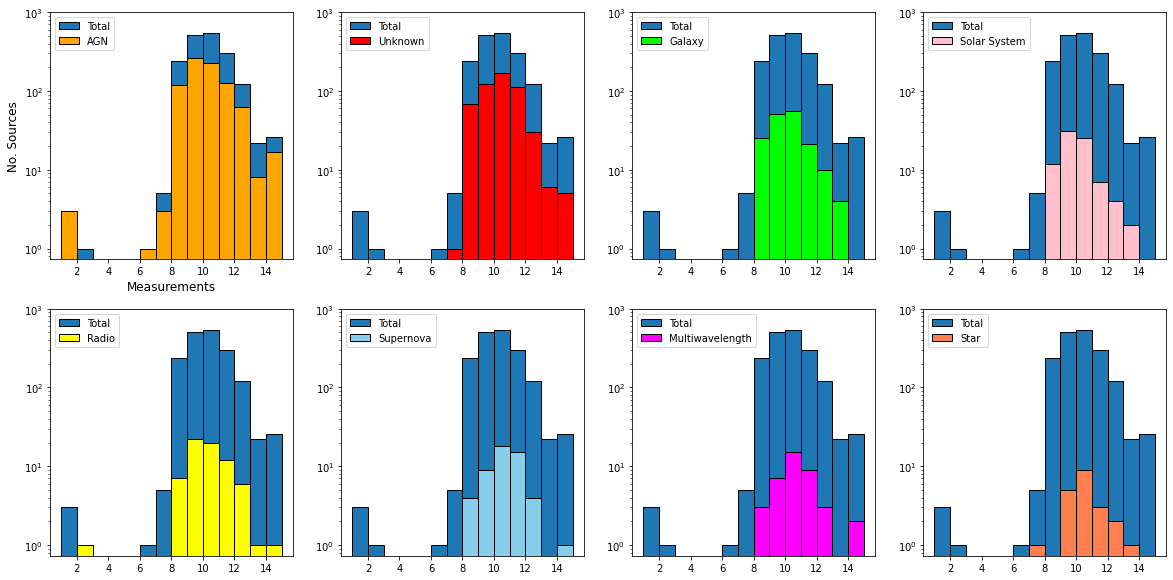

In [68]:
#plt.style.use('fivethirtyeight')
bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
figsize=(20,10)
fig,([ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8])=plt.subplots(nrows=2,ncols=4,figsize=figsize)

ax1.hist(VAST_measurement_count,bins=bins,edgecolor='black',log=True,label='Total')
ax1.hist(VAST_measurement_count_AGN,bins=bins,edgecolor='black',log=True,label='AGN',color='orange')
ax1.legend(loc='upper left')
ax1.set_xlabel('Measurements',fontsize='large')
ax1.set_ylabel('No. Sources',fontsize='large')
ax1.set_ylim(top=1000)

ax2.hist(VAST_measurement_count,bins=bins,edgecolor='black',log=True,label='Total')
ax2.hist(VAST_measurement_count_Unknown,bins=bins,edgecolor='black',log=True,label='Unknown',color='red')
ax2.legend(loc='upper left')
ax2.set_ylim(top=1000)

ax3.hist(VAST_measurement_count,bins=bins,edgecolor='black',log=True,label='Total')
ax3.hist(VAST_measurement_count_Galaxy,bins=bins,edgecolor='black',log=True,label='Galaxy',color='lime')
ax3.legend(loc='upper left')
ax3.set_ylim(top=1000)

ax4.hist(VAST_measurement_count,bins=bins,edgecolor='black',log=True,label='Total')
ax4.hist(VAST_measurement_count_SS,bins=bins,edgecolor='black',log=True,label='Solar System',color='pink')
ax4.legend(loc='upper left')
ax4.set_ylim(top=1000)

######

ax5.hist(VAST_measurement_count,bins=bins,edgecolor='black',log=True,label='Total')
ax5.hist(VAST_measurement_count_Radio,bins=bins,edgecolor='black',log=True,label='Radio',color='yellow')
ax5.legend(loc='upper left')
ax5.set_ylim(top=1000)

ax6.hist(VAST_measurement_count,bins=bins,edgecolor='black',log=True,label='Total')
ax6.hist(VAST_measurement_count_SN,bins=bins,edgecolor='black',log=True,label='Supernova',color='skyblue')
ax6.legend(loc='upper left')
ax6.set_ylim(top=1000)

ax7.hist(VAST_measurement_count,bins=bins,edgecolor='black',log=True,label='Total')
ax7.hist(VAST_measurement_count_MW,bins=bins,edgecolor='black',log=True,label='Multiwavelength',color='fuchsia')
ax7.legend(loc='upper left')
ax7.set_ylim(top=1000)

ax8.hist(VAST_measurement_count,bins=bins,edgecolor='black',log=True,label='Total')
ax8.hist(VAST_measurement_count_Star,bins=bins,edgecolor='black',log=True,label='Star',color='coral')
ax8.legend(loc='upper left')
ax8.set_ylim(top=1000)

plt.show()

In [70]:
#Save it if you like it!
fig.savefig('CMS_Histograms.png',facecolor='white')

Ok, now onto Optical: